# Project: TMDB Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
<li><a href="#References">References</a></li>

</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from the Movie Database (TMDb).

> All columns in this dataset includes: id, imdb_id, popularity, budget, revenu, original_titlecast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.
The significance of these columns is to give a quint description of what each data represents in this dataset.
                
                
           
                
                
                 
                  
    
            
              
           
            
             
         


### Question(s) for Analysis

> The question I will be asking are:
1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?





In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


Python libraries such as Numpy, Pandas and matplotlib have been used in this Anaalysis.


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0



Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


Inorder to use the dataframe, this platform requires an upgrade, hence the reason for this code

<a id='wrangling'></a>
## Data Wrangling


Here, the data is read from the csv file and then shows five rows of the dataset we will be using.

In [3]:
# Load your data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


This shows the basic information of the dataset. From this, I've been able to deduce that there are some missing values in certain columns which needs to be thouroughly cleaned such as the imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies

In [4]:
# types and look for instances of missing data.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This gives the total number of columns and rows in the dataset

In [5]:
# This is to get the number of rows and columns in the dataset.
df.shape

(10866, 21)

This is meant to understand our data a little bit more and also identify changes we need to make by showing further statistics of the dataset such as the mean, Min, Max etc

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

 

We need to first check if there are duplicates in the dataset then drop if any

In [7]:
#check for the number of duplicates
df.duplicated().sum()

1

In [8]:
#drop duplicates and check if duplicates still exist. 
df.drop_duplicates(inplace= True)
df.duplicated().sum()

0

Columns that are not relevant to this Analysis have been identified and dropped

In [9]:
# drop columns not relevant to the project 
drop_columns = ['id', 'imdb_id', 'homepage',
             'tagline', 'keywords', 'overview', 'release_date']
df.drop(drop_columns, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


Now, the cast, director, genres and production_companies all having missing values which needs to be filled or dropped

The previous code showed an error, therefore the columns with incomplete rows are dropped

In [10]:
# drop columns with incomplete rows
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [11]:
# check for the statistics of the dataset 
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


Having checked this cell properly, It is impossible to have a minimum value of zero as the budget as well as the revenue, runtime, budget_adj and revenue_adj. 
This therefore indicates that there is still further cleaning to be done.


In [12]:
# Drop invalid data and check
index_err = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(index_err, axis=0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 445.9+ KB


In [13]:
#check again for the statics of the daaset after cleaning
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


The abnormalies have been fixed/cleaned therefore this looks ready to be exploreed.
Also, the info shows that the columns have been cleaned and now ready to be used for exploration.

<a id='eda'></a>
## Exploratory Data Analysis




### Which Genres are most Popular from year to year?
To answer this question, first there is a need for us to get the popularity or trend of popularity each year.

In [14]:
# view columns needed for exploration
df_genres = df[['release_year', 'genres', 'popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014


As there are multiple genres resident in a single year, there is need for us to split the different genres therefore i have used the following link inorder to get an idea on how to do this https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe. 

In [15]:
 from itertools import chain

# Return list from series of separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

# Calculate lengths of splits
lens = df_genres['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(df_genres['release_year'], lens),                       
                          'genres': chainer(df_genres['genres']),
                          'popularity': np.repeat(df_genres['popularity'], lens)})

df_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


There is a need to select the most popular genres for each year. To do this, i had to source for the code from stackoverflow via this link https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group.

In [16]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1960,Thriller,2.610362
2,1961,Animation,2.631987
3,1962,Thriller,3.170651
4,1963,Adventure,1.586280


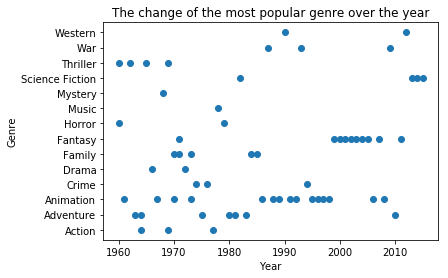

In [17]:
#plot a scatter diagram of the change in the most popular genre
plt.scatter(df_most_pop.release_year, df_most_pop.genres)
plt.title('Change of the most popular genre over the year')
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

From the scatterplot above, it is easy to show that the most popular genre changed over the year. However, in some periods there are little to no changes. Overall, the most popular genre in 1990s is animation, while it becomes fantasy in 2000s. In the 2010s, the adventure and war are the most popular genres watched more.

In [ ]:
# Draw the bar chart to compare the revenue in differet decades
rev_dis = df.groupby('decade').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades')
plt.xlabel('Decade')
plt.ylabel('Revenue')

plt.show()

### Question 2: What kinds of properties are associated with movies that have high revenues?

Here, there is need to make a clear conclusion as to what properties in the dataset is associated with high revenue, to do this however, there is need to start our exploration by first getting the statistical representation of the revenue.

In [18]:
# view the statistics for revenue 
df.revenue.describe()

count    3.805000e+03
mean     1.089734e+08
std      1.772976e+08
min      2.000000e+00
25%      1.433379e+07
50%      4.621664e+07
75%      1.260695e+08
max      2.781506e+09
Name: revenue, dtype: float64

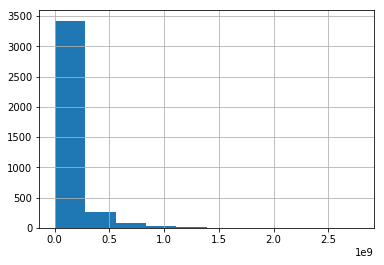

In [21]:
# Get the histogram of the revenue
df.revenue.hist();

Preferrably, a graph will be plotted to know the change in revenue of movies from year to year.


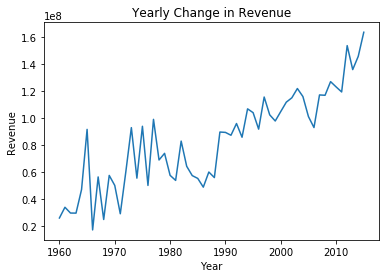

In [19]:
# Plot a line chart for the yearly change in revenue
revenues = df.groupby('release_year')['revenue'].mean()
plt.plot(revenues)
plt.title('Yearly Change in Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

The graph above shows an upward trend in revenue as the year progressed. Although there was a sudden spike in the mid 1960s and also an irregular change in revenue from mid 1960s up until around 1990.

In [20]:
# extract the high revenue dataframe
high_revenue = df.revenue.quantile(.75)
high_rev_df = df[df.revenue > high_revenue]
high_rev_df.revenue.describe()

count    9.510000e+02
mean     3.224217e+08
std      2.479904e+08
min      1.262169e+08
25%      1.690838e+08
50%      2.348019e+08
75%      3.688734e+08
max      2.781506e+09
Name: revenue, dtype: float64

what the above does is to find the pattern of the highest revenue. Statistically, the highest revenue is one higher than 75%.
With this, we have been able to extract the high revenue dataframe inorder to be able to perform multiple variable exploration not just using revenue but HIGH REVENUE MOVIE - Emphasis on this.

#### CORRELATION BETWEEN BUDGET AND REVENUE, VOTE_AVERAGE AND REVENUE, POPULARITY AND REVENUE

Now, In order to discover the correlation between different variables, we will need to select two or more variables, preferrably 3 variables which are: popularity, budget and the vote average. In order to determine relationships, scatter plots will be used.




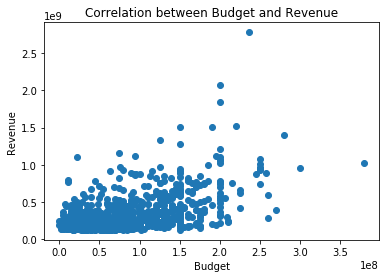

In [21]:
# Plot scatter diagram of correlation between Budget and Revenue
plt.scatter(x=high_rev_df.budget, y=high_rev_df.revenue)
plt.title('Correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

This shows a positive but not so strong relationship as the line is non linear.

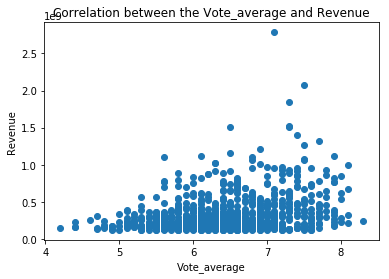

In [22]:
# Plot scatter diagram of correlation between Vote_average and Revenue
plt.scatter(x=high_rev_df.vote_average, y=high_rev_df.revenue)
plt.title('Correlation between the Vote_average and Revenue')
plt.xlabel('Vote_average')
plt.ylabel('Revenue')

plt.show()

This is a really low correlation compared to the budget.

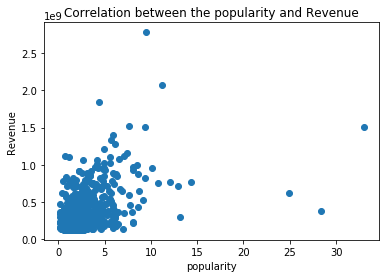

In [24]:
# Plot scatter diagram of correlation between Popularity and Revenue
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('Correlation between the popularity and Revenue')
plt.xlabel('popularity')
plt.ylabel('Revenue')

plt.show()

This is a non-linear, positive relationship and a more stronger correlation between the other two variables.


<a id='conclusions'></a> 
## Conclusions

> 1. For the first question, Over the years, it has been observed through exploration that the Animation, Adventure, Family and Fantasy account for the largest number of the most popular genre. 
>     Therefore any movie that is based on these four genres has the ability to achieve a high popularity status. Producers are therefore enjoined to focus more on these genres.

> 2. It was observed that the more popular a movie is, the higher the revenue it will generate, therefore stakeholders should focus on producing movies based on the recommended genres in 1 above.  


<a id='conclusions'></a> 
## Limitations

1. The limitation of this research is that there are a lot of data that have been dropped during the cleaning process therefore we could not have a complete representation of the actual population.

2. Project limited to just two questions which does not fully capture the solution to the entirety of this dataset

<a id='conclusions'></a> 
### References
1. https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe. 
2. https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group.

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0